In [42]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
engines = ['ada', 'babbage', 'curie', 'davinci']

size = 50

In [31]:
def plot_distributions(points_1, points_2):
    fig, ax = plt.subplots()

    ax.scatter(points_1[:,0], points_1[:, 1], color='blue')
    ax.scatter(points_2[:,0], points_2[:, 1], color='red')
    plt.show()

rounding = np.vectorize(round)

c = dict()

# (1)

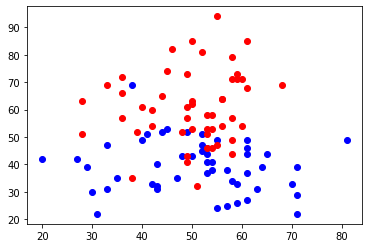

In [54]:
dist_type = 1
c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([50, 40],
                                                [[160, 0], [0, 80]],
                                                size=size,
                                                random_state=55)
                            )
c[(dist_type, 1)] = rounding(
                        multivariate_normal.rvs([50, 60],
                                                [[80, 0], [0, 160]],
                                                size=size,
                                                random_state=56)
                            )

    
plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])


# (2)

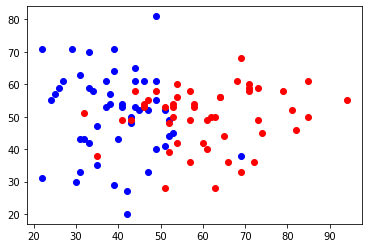

In [55]:
dist_type = 2
c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([40, 50],
                                                [[80, 0], [0, 160]],
                                                size=size,
                                                random_state=55)
                            )
c[(dist_type, 1)] = rounding(
                        multivariate_normal.rvs([60, 50],
                                                [[160, 0], [0, 80]],
                                                size=size,
                                                random_state=56)
                            )

    
plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])


# (3)

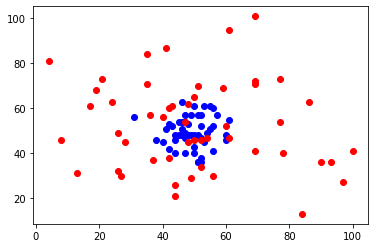

In [56]:
dist_type = 3

def push_away(point):
    x, y = point
    return [(x-50)*9+ x, (y-50)*9 + y]


c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([50, 50],
                                            [[50, 0], [0, 50]],
                                            size=size,
                                            random_state=42)
                            )
c[(dist_type, 1)] = rounding(
                        np.array([push_away(x) for x in multivariate_normal.rvs(
                                            [50, 50],
                                            [[5, 0], [0, 5]],
                                            size=size,
                                            random_state=43)])
                            )

    
plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])

# (4)

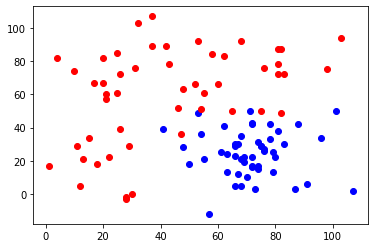

In [57]:
dist_type = 4

var = 200
mixture = np.concatenate((
                            multivariate_normal.rvs([25, 25],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=42),
                            multivariate_normal.rvs([25, 75],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=43),
                            multivariate_normal.rvs([75, 75],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=44)
                        ))

indices = np.random.choice(mixture.shape[0], size, replace=False)
mixture_sample = mixture[indices]

c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([75, 25],
                                                [[var, 0], [0, var]],
                                                size=size,
                                                random_state=45)
                            )
c[(dist_type, 1)] = rounding(
                        mixture_sample
                            )


plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])

# (5)

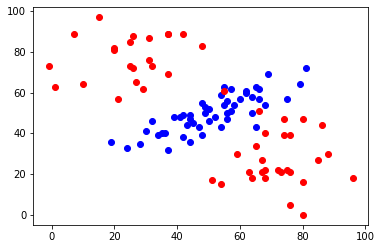

In [58]:
dist_type = 5

var = 200
mixture = np.concatenate((
                            multivariate_normal.rvs([75, 25],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=42),
                            multivariate_normal.rvs([25, 75],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=43),
                        ))

indices = np.random.choice(mixture.shape[0], size, replace=False)
mixture_sample = mixture[indices]


c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([50, 50],
                                                [[var, 120], [120, var/2]],
                                                size=size,
                                                random_state=44)
                            )
c[(dist_type, 1)] = rounding(
                        mixture_sample
                            )


plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])

# (6)

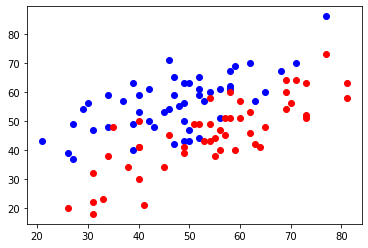

In [59]:
dist_type = 6

var = 200

c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([45, 55],
                                                [[var, 120], [120, var/1.5]],
                                                size=size,
                                                random_state=42)
                            )
c[(dist_type, 1)] = rounding(
                        multivariate_normal.rvs([55, 45],
                                                [[var, 120], [120, var/1.5]],
                                                size=size,
                                                random_state=43)
                            )


plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])


# (7)

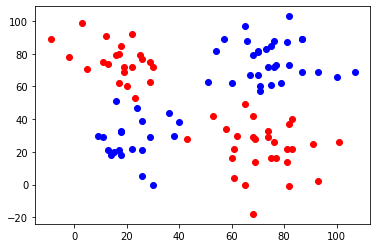

In [60]:
dist_type = 7

var = 200
mixture1 = np.concatenate((
                            multivariate_normal.rvs([25, 25],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=42),
                            multivariate_normal.rvs([75, 75],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=43),
                        ))

indices = np.random.choice(mixture1.shape[0], size, replace=False)
mixture_sample1 = mixture1[indices]

mixture2 = np.concatenate((
                            multivariate_normal.rvs([75, 25],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=44),
                            multivariate_normal.rvs([25, 75],
                                                    [[var, 0], [0, var]],
                                                    size=size,
                                                    random_state=45),
                        ))

indices = np.random.choice(mixture2.shape[0], size, replace=False)
mixture_sample2 = mixture2[indices]

c[(dist_type, 0)] = rounding(
                        mixture_sample1
                            )
c[(dist_type, 1)] = rounding(
                        mixture_sample2
                            )


plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])


# (8)

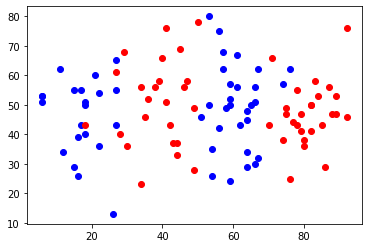

In [61]:
dist_type = 8
var = 200
mixture1 = np.concatenate((
                            multivariate_normal.rvs([20, 50],
                                                    [[var/4, 0], [0, var]],
                                                    size=size,
                                                    random_state=42),
                            multivariate_normal.rvs([60, 50],
                                                    [[var/4, 0], [0, var]],
                                                    size=size,
                                                    random_state=43),
                        ))

indices = np.random.choice(mixture1.shape[0], size, replace=False)
mixture_sample1 = mixture1[indices]

mixture2 = np.concatenate((
                            multivariate_normal.rvs([40, 50],
                                                    [[var/4, 0], [0, var]],
                                                    size=size,
                                                    random_state=44),
                            multivariate_normal.rvs([80, 50],
                                                    [[var/4, 0], [0, var]],
                                                    size=size,
                                                    random_state=45),
                        ))

indices = np.random.choice(mixture2.shape[0], size, replace=False)
mixture_sample2 = mixture2[indices]

c[(dist_type, 0)] = rounding(
                        mixture_sample1
                            )
c[(dist_type, 1)] = rounding(
                        mixture_sample2
                            )


plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])


# (9)

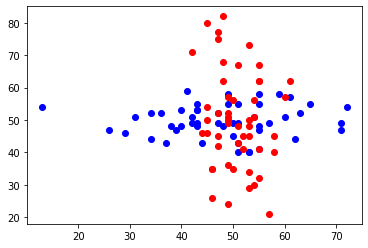

In [62]:
dist_type = 9

var = 200

c[(dist_type, 0)] = rounding(
                        multivariate_normal.rvs([50, 50],
                                                [[var, 0], [0, var/8]],
                                                size=size,
                                                random_state=42)
                            )
c[(dist_type, 1)] = rounding(
                        multivariate_normal.rvs([50, 50],
                                                [[var/8, 0], [0, var]],
                                                size=size,
                                                random_state=43)
                            )


plot_distributions(c[(dist_type, 0)], c[(dist_type, 1)])


## Putting them all together

In [64]:
distribution_samples = pd.DataFrame(columns=["x", "y", "class", "type"])
samples_array = np.array([0, 0, 0, 0])

for type_ in range(1, 10):
    for class_ in [0, 1]:
        arr = np.c_[ c[(type_, class_)], [class_]*size, [type_]*size ]
        samples_array = np.vstack((samples_array, arr))

(901, 4)

## Testing:

In [41]:
from collections import defaultdict

experiment_names = [f'2d_class_type_{x}_rstate_' for x in range(1,10)]

results = dict()

rstates = ['42', '55', '93']
with open('experiments_log.json', 'r') as file:
    experiments = json.loads(file.read())

for name in experiment_names:
    results[name] = defaultdict(list)
    #print(f'{name}:')
    #print('-----')

    for rstate in rstates:
        experiment = experiments[name + rstate]

        x_train = experiment['input_train']
        y_train = experiment['output_train']
        x_test = experiment['input_test']
        y_test = experiment['output_test']

        neigh = KNeighborsClassifier(n_neighbors=5)
        neigh.fit(x_train, y_train)
        #print(f'knn {neigh.score(x_test, y_test)}')
        results[name]['knn'].append(neigh.score(x_test, y_test))

        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        classifier = LogisticRegression(random_state = 0, solver='lbfgs',
                                            multi_class='auto')
        classifier.fit(x_train, y_train)

        #print(f'lr {classifier.score(x_test, y_test)}')

        results[name]['lr'].append(classifier.score(x_test, y_test))

        for engine in engines:
            gpt_preds = experiment[f'output_test_cleaned_{engine}']
            accurate = [1 if x==y else 0
                        for x, y in zip(y_test, gpt_preds)]
            #print(name, engine, sum(accurate)/len(accurate))
            results[name][engine].append(sum(accurate)/len(accurate))
   # print('----')



In [39]:
aggregate = defaultdict(list)
for key in results.keys():
    print('---')
    print(key)
    for keyy in results[key]:
        print(keyy, np.mean(results[key][keyy]))
        aggregate[keyy].append(np.mean(results[key][keyy]))

---
2d_class_type_1_rstate_
knn 0.7555555555555555
lr 0.7555555555555555
ada 0.8000000000000002
babbage 0.6333333333333334
curie 0.7666666666666666
davinci 0.6777777777777777
---
2d_class_type_2_rstate_
knn 0.7888888888888889
lr 0.7888888888888889
ada 0.6777777777777777
babbage 0.6222222222222222
curie 0.7111111111111111
davinci 0.7666666666666667
---
2d_class_type_3_rstate_
knn 0.7111111111111111
lr 0.4666666666666666
ada 0.7777777777777778
babbage 0.7222222222222222
curie 0.7555555555555555
davinci 0.7777777777777778
---
2d_class_type_4_rstate_
knn 0.9333333333333335
lr 0.9333333333333335
ada 0.8555555555555556
babbage 0.9111111111111111
curie 0.8666666666666667
davinci 0.8222222222222223
---
2d_class_type_5_rstate_
knn 0.9888888888888889
lr 0.3888888888888889
ada 0.9111111111111111
babbage 0.8777777777777778
curie 0.9333333333333332
davinci 0.9555555555555556
---
2d_class_type_6_rstate_
knn 0.7555555555555555
lr 0.8111111111111112
ada 0.5111111111111111
babbage 0.5555555555555555
cu

In [40]:
for key in aggregate:
    print(key, np.mean(aggregate[key]))

knn 0.817283950617284
lr 0.6234567901234569
ada 0.7370370370370369
babbage 0.7209876543209877
curie 0.75679012345679
davinci 0.7592592592592593


In [48]:
rs = [42, 55, 93, 101, 120, 128, 142, 155, 225, 240]



In [49]:
exp_names = [f'2d_class_type_7_small_train_rstate_{rstate}' for rstate in rs]

results_small_train = defaultdict(list)

with open('experiments_log.json', 'r') as file:
    experiments = json.loads(file.read())

for name in exp_names:
    experiment = experiments[name]

    x_train = experiment['input_train']
    y_train = experiment['output_train']
    x_test = experiment['input_test']
    y_test = experiment['output_test']

    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(x_train, y_train)
    #print(f'knn {neigh.score(x_test, y_test)}')
    results_small_train['knn'].append(neigh.score(x_test, y_test))

    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    classifier = LogisticRegression(random_state = 0, solver='lbfgs',
                                        multi_class='auto')
    classifier.fit(x_train, y_train)

    #print(f'lr {classifier.score(x_test, y_test)}')

    results_small_train['lr'].append(classifier.score(x_test, y_test))

    for engine in engines:
        gpt_preds = experiment[f'output_test_cleaned_{engine}']
        accurate = [1 if x==y else 0
                    for x, y in zip(y_test, gpt_preds)]
        #print(name, engine, sum(accurate)/len(accurate))
        results_small_train[engine].append(sum(accurate)/len(accurate))
   # print('----')



In [54]:
for i in results_small_train:
    print(i, np.mean(results_small_train[i]), np.std(results_small_train[i]))

knn 0.70625 0.1267070933294581
lr 0.5375 0.09354143466934853
ada 0.546875 0.0729538595620547
babbage 0.49375 0.08003905296791061
curie 0.553125 0.09169625469450757
davinci 0.509375 0.11271680498044646


In [57]:
exp_names = [f'2d_class_type_1_evenodd_rstate_{rs}' for rs in [42, 55, 93]]

results = defaultdict(list)

for name in exp_names:
    experiment = experiments[name]
    for engine in engines:
        gpt_preds = experiment[f'output_test_cleaned_{engine}']
        accurate = [1 if x==y else 0
                    for x, y in zip(y_test, gpt_preds)]
        #print(name, engine, sum(accurate)/len(accurate))
        results[engine].append(sum(accurate)/len(accurate))

In [58]:
print(results)

defaultdict(<class 'list'>, {'ada': [0.5666666666666667, 0.5, 0.4666666666666667], 'babbage': [0.5, 0.6, 0.5666666666666667], 'curie': [0.5333333333333333, 0.6, 0.4666666666666667], 'davinci': [0.5, 0.5, 0.4666666666666667]})
